In [1]:
import numpy as np
import pandas as pd

In [4]:
loan_data_preprocessed_backup=pd.read_csv('loan_preprocessed.csv')

c:\users\rhitc\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (21,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
loan_data_preprocessed=loan_data_preprocessed_backup.copy()

In [8]:
loan_data_preprocessed['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [84]:
del loan_data_default
loan_data_default=loan_data_preprocessed[loan_data_preprocessed['loan_status'].isin(['Charged Off','Does not meet the credit policy. Status:Charged Off'])]

In [85]:
loan_data_default.shape

(43236, 208)

In [58]:
pd.options.display.max_rows=None

In [59]:
loan_data_default.isnull().sum()

Unnamed: 0                                                             0
Unnamed: 0.1                                                           0
id                                                                     0
member_id                                                              0
loan_amnt                                                              0
funded_amnt                                                            0
funded_amnt_inv                                                        0
term                                                                   0
int_rate                                                               0
installment                                                            0
grade                                                                  0
sub_grade                                                              0
emp_title                                                           3287
emp_length                                         

# Independent Variables
No need for fine classing and coarse classing as we dot't need to comprehend LGD model much

In [86]:
loan_data_default['mths_since_last_delinq'].fillna(0,inplace=True)
loan_data_default['mths_since_last_record'].fillna(0,inplace=True)

c:\users\rhitc\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


# Dependent Model

In [87]:
loan_data_default['recoveries'].head()

1     117.08
8     189.06
9     269.29
12    444.30
14    645.10
Name: recoveries, dtype: float64

In [88]:
loan_data_default['recovery_rate']=loan_data_default['recoveries']/loan_data_default['funded_amnt']

c:\users\rhitc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [89]:
loan_data_default['recovery_rate'].describe()

count    43236.000000
mean         0.060820
std          0.089770
min          0.000000
25%          0.000000
50%          0.029466
75%          0.114044
max          1.220774
Name: recovery_rate, dtype: float64

Recovery rate should be between 0- 1 but here we can see its greater than 1. (may be due to error in data). Hence, data for recovery rate >1 is made =1

In [90]:
loan_data_default['recovery_rate']=np.where(loan_data_default['recovery_rate']>1,1,loan_data_default['recovery_rate'])
loan_data_default['recovery_rate']=np.where(loan_data_default['recovery_rate']<0,0,loan_data_default['recovery_rate'])

c:\users\rhitc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\rhitc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [91]:
loan_data_default['recovery_rate'].describe()

count    43236.000000
mean         0.060770
std          0.089202
min          0.000000
25%          0.000000
50%          0.029466
75%          0.114044
max          1.000000
Name: recovery_rate, dtype: float64

In [92]:
##CCF=Credit Conversion Factor= EAD/Total funded amount
loan_data_default['CCF']=(loan_data_default['funded_amnt']-loan_data_default['total_rec_prncp'])/loan_data_default['funded_amnt']

c:\users\rhitc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [93]:
loan_data_default['CCF'].describe()

count    43236.000000
mean         0.735952
std          0.200742
min          0.000438
25%          0.632088
50%          0.789908
75%          0.888543
max          1.000000
Name: CCF, dtype: float64

# Explore Dependent Variable

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

(array([2.1023e+04, 1.8370e+03, 3.8730e+03, 1.3940e+03, 2.1330e+03,
        3.3440e+03, 4.7650e+03, 1.7130e+03, 1.1790e+03, 4.0600e+02,
        3.4100e+02, 2.7400e+02, 1.1700e+02, 9.3000e+01, 8.1000e+01,
        7.3000e+01, 5.4000e+01, 7.2000e+01, 5.7000e+01, 3.0000e+01,
        4.7000e+01, 2.7000e+01, 1.7000e+01, 1.5000e+01, 2.0000e+01,
        2.3000e+01, 1.7000e+01, 7.0000e+00, 1.1000e+01, 7.0000e+00,
        8.0000e+00, 7.0000e+00, 7.0000e+00, 8.0000e+00, 7.0000e+00,
        1.0000e+01, 6.0000e+00, 1.1000e+01, 9.0000e+00, 9.0000e+00,
        6.0000e+00, 6.0000e+00, 6.0000e+00, 3.0000e+00, 9.0000e+00,
        9.0000e+00, 1.5000e+01, 8.0000e+00, 9.0000e+00, 3.3000e+01]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.

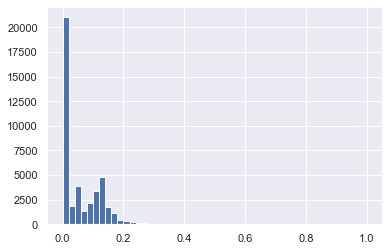

In [95]:
plt.hist(loan_data_default['recovery_rate'],bins=50)

(array([  20.,   60.,   29.,   97.,   70.,   84.,  150.,   78.,  124.,
         170.,  152.,  208.,  199.,  228.,  242.,  276.,  300.,  335.,
         339.,  376.,  412.,  421.,  505.,  505.,  575.,  583.,  614.,
         735.,  756.,  812.,  840.,  942.,  959., 1137., 1217., 1418.,
        1431., 1580., 1732., 1850., 2003., 2151., 2123., 2376., 2447.,
        2693., 2366., 2115., 1527.,  874.]),
 array([4.3800000e-04, 2.0429240e-02, 4.0420480e-02, 6.0411720e-02,
        8.0402960e-02, 1.0039420e-01, 1.2038544e-01, 1.4037668e-01,
        1.6036792e-01, 1.8035916e-01, 2.0035040e-01, 2.2034164e-01,
        2.4033288e-01, 2.6032412e-01, 2.8031536e-01, 3.0030660e-01,
        3.2029784e-01, 3.4028908e-01, 3.6028032e-01, 3.8027156e-01,
        4.0026280e-01, 4.2025404e-01, 4.4024528e-01, 4.6023652e-01,
        4.8022776e-01, 5.0021900e-01, 5.2021024e-01, 5.4020148e-01,
        5.6019272e-01, 5.8018396e-01, 6.0017520e-01, 6.2016644e-01,
        6.4015768e-01, 6.6014892e-01, 6.8014016e-01, 7.0

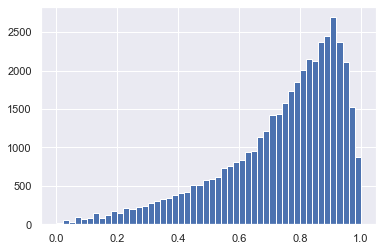

In [96]:
plt.hist(loan_data_default['CCF'],bins=50)

In [97]:
loan_data_default['recovery_Rate_0_1']=np.where(loan_data_default['recoveries']==0,0,1)

c:\users\rhitc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [319]:
loan_data_default.to_csv('loan_data_default') # for using the data in EAD calculation

# LGD modelling
## Beta regression is not stable in pyhton.. so for LGD, Logistic and Linear regression is used here

# Stage 1- Logistic Regression

## Splitting Data

In [36]:
from sklearn.model_selection import train_test_split

In [210]:
lgd_input_1_train,lgd_input_1_test,lgd_target_1_train,lgd_target_1_test=train_test_split(loan_data_default.drop(['recoveries','recovery_Rate_0_1','CCF'],axis=1),loan_data_default['recovery_Rate_0_1'],test_size=0.2,random_state=42)

In [123]:
features_all=['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'home_ownership:MORTGAGE',
'home_ownership:ANY',
'home_ownership:OTHER',
'home_ownership:NONE',
'home_ownership:RENT',
'home_ownership:OWN',
'purpose:debt_consolidation',
'purpose:credit_card',
'purpose:car', 
'purpose:home_improvement', 
'purpose:moving',
'purpose:educational', 
'purpose:medical',
'purpose:major_purchase',
'purpose:renewable_energy',
'purpose:other',
'purpose:wedding',
'purpose:vacation',
'purpose:small_business',
'initial_list_status:f',
'initial_list_status:w',
'emp_length_int',
'term_int',
'months_since_credit_Cr_line',
'months_issue_date',
'funded_amnt',
'int_rate',
'installment',
'annual_inc',
'dti',
'delinq_2yrs',
'inq_last_6mths',
'mths_since_last_record',
'mths_since_last_delinq',
'open_acc',
'pub_rec',
'total_acc',
'total_rev_hi_lim',
'acc_now_delinq'
]

In [124]:
features_ref_cat=['grade:G',
'verification_status:Verified',
'home_ownership:RENT',
'purpose:credit_card',
'initial_list_status:f'
]

In [125]:
lgd_input_1_train=lgd_input_1_train[features_all]

In [126]:
lgd_input_1_train=lgd_input_1_train.drop(features_ref_cat,axis=1)

In [129]:
lgd_input_1_train.shape

(34588, 44)

In [80]:
from sklearn.linear_model import LogisticRegression

In [130]:
reg_stage_1=LogisticRegression()

In [131]:
reg_stage_1.fit(lgd_input_1_train,lgd_target_1_train)

c:\users\rhitc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

## Creating a Summary Table

In [132]:
feature_name=lgd_input_1_train.columns.values

In [137]:
summary_table=pd.DataFrame(columns=['Feature name'],data=feature_name)
summary_table['Coefficients']=np.transpose(reg_stage_1.coef_)
summary_table.index=summary_table.index+1
summary_table.loc[0]=['Intercept',reg_stage_1.intercept_[0]]
summary_table

,Feature name,Coefficients
1,grade:A,-2.168306e-06
2,grade:B,-3.756395e-05
3,grade:C,-9.323334e-05
4,grade:D,2.727171e-05
5,grade:E,1.563110e-05
6,grade:F,6.192686e-05
7,verification_status:Not Verified,-6.883330e-06
8,verification_status:Source Verified,-1.388214e-04
9,home_ownership:MORTGAGE,-2.875338e-05
10,home_ownership:ANY,0.000000e+00


# Testing the Model

In [308]:
lgd_input_1_test=lgd_input_1_test[features_all]

In [309]:
lgd_input_1_test=lgd_input_1_test.drop(features_ref_cat,axis=1)

In [141]:
y_hat_test_1=reg_stage_1.predict(lgd_input_1_test)

In [142]:
y_hat_test_1

array([1, 1, 0, ..., 0, 1, 1])

In [154]:
Y_hat_prob_1=reg_stage_1.predict_proba(lgd_input_1_test)

array([[0.40938617, 0.59061383],
       [0.40818719, 0.59181281],
       [0.57707111, 0.42292889],
       ...,
       [0.59280611, 0.40719389],
       [0.40159541, 0.59840459],
       [0.45670777, 0.54329223]])

In [165]:
# Probability for recovery rate greater than 0 
y_hat_prob_1=Y_hat_prob_1[:,1]
y_hat_prob_1

array([0.59061383, 0.59181281, 0.42292889, ..., 0.40719389, 0.59840459,
       0.54329223])

In [203]:
lgd_target_1_test_temp=lgd_target_1_test

In [215]:
lgd_target_1_test_temp=lgd_target_1_test_temp.reset_index(drop=True,inplace=False)

In [216]:
df_actual_predicted_prob=pd.concat([lgd_target_1_test_temp,pd.DataFrame(y_hat_prob_1)],axis=1)

In [217]:
df_actual_predicted_prob.index=lgd_target_1_test.index

In [218]:
df_actual_predicted_prob.columns=['Actual','Predicted_probs']

In [219]:
df_actual_predicted_prob.head()

,Actual,Predicted_probs
178928,1,0.590614
69814,1,0.591813
101396,0,0.422929
463268,1,0.502977
253729,0,0.438695


## Accuracy of Model

In [221]:
cutoff=0.5
df_actual_predicted_prob['Predicted']=np.where(df_actual_predicted_prob['Predicted_probs']>cutoff,1,0)

In [222]:
pd.crosstab(df_actual_predicted_prob['Actual'],df_actual_predicted_prob['Predicted'])

Predicted,0,1
Actual,,
0,1160,2602
1,891,3995


In [225]:
pd.crosstab(df_actual_predicted_prob['Actual'],df_actual_predicted_prob['Predicted'])/df_actual_predicted_prob.shape[0]

Predicted,0,1
Actual,,
0,0.134135,0.300879
1,0.103030,0.461957


In [226]:
from sklearn.metrics import roc_curve,roc_auc_score

In [227]:
fpr,tpr,threshold=roc_curve(df_actual_predicted_prob['Actual'],df_actual_predicted_prob['Predicted_probs'])

Text(0.5, 1.0, 'ROC')

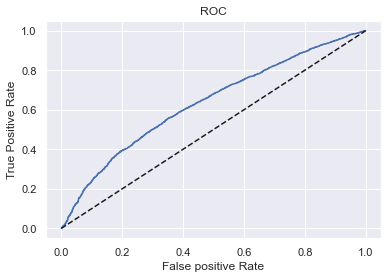

In [230]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,linestyle='--',color='k')
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

In [232]:
AUCROC=roc_auc_score(df_actual_predicted_prob['Actual'],df_actual_predicted_prob['Predicted_probs'])
AUCROC

0.6342711645833347

## Saving the model

In [233]:
import pickle

In [234]:
pickle.dump(reg_stage_1,open('Logit_stage_1.sav','wb'))  #unpickle.load() to call the model

# Stage 2- Linear Regression

In [239]:
lgd_stage_2_data=loan_data_default[loan_data_default['recovery_Rate_0_1']==1]

In [299]:
lgd_stage_2_input_train,lgd_stage_2_input_test,lgd_stage_2_target_train,lgd_stage_2_target_test=train_test_split(lgd_stage_2_data.drop(['recovery_rate', 'CCF','recovery_Rate_0_1'],axis=1),lgd_stage_2_data['recovery_rate'],test_size=0.2,random_state=42)

In [262]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()

In [265]:
lgd_stage_2_input_train=lgd_stage_2_input_train[features_all]

In [268]:
lgd_stage_2_input_train=lgd_stage_2_input_train.drop(features_ref_cat,axis=1)

In [269]:
lin_reg.fit(lgd_stage_2_input_train,lgd_stage_2_target_train)

LinearRegression()

## Summary Table

In [270]:
feature_name=lgd_stage_2_input_train.columns.values

In [273]:
summary_table=pd.DataFrame(columns=['Feature name'],data=feature_name)
summary_table['Coefficients']=np.transpose(lin_reg.coef_)
summary_table.index=summary_table.index+1
summary_table.loc[0]=['Intercept',lin_reg.intercept_]
summary_table

,Feature name,Coefficients
1,grade:A,-6.817107e-02
2,grade:B,-5.074311e-02
3,grade:C,-3.738639e-02
4,grade:D,-2.708462e-02
5,grade:E,-1.309302e-02
6,grade:F,-5.193408e-03
7,verification_status:Not Verified,1.072438e-03
8,verification_status:Source Verified,-1.006387e-03
9,home_ownership:MORTGAGE,2.848479e-03
10,home_ownership:ANY,-4.098935e-13


# validation

In [274]:
lgd_stage_2_input_test=lgd_stage_2_input_test[features_all]

In [275]:
lgd_stage_2_input_test=lgd_stage_2_input_test.drop(features_ref_cat,axis=1)

In [276]:
y_hat_test_stage_2=lin_reg.predict(lgd_stage_2_input_test)

In [300]:
y_hat_test_stage_2

array([0.09396541, 0.15455435, 0.13063903, ..., 0.11705658, 0.11147085,
       0.12294596])

In [301]:
lgd_stage_2_target_test_temp=lgd_stage_2_target_test.copy()

In [302]:
lgd_stage_2_target_test_temp=lgd_stage_2_target_test_temp.reset_index(drop=True)

In [303]:
pd.concat([lgd_stage_2_target_test_temp,pd.DataFrame(y_hat_test_stage_2)],axis=1).corr()

,recovery_rate,0
recovery_rate,1.000000,0.308049
0,0.308049,1.000000


Correlation is 0.31 is good for model. Very high correlation shows model methodology not perfect

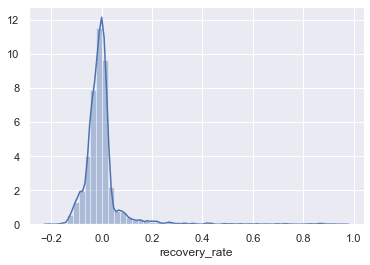

In [304]:
#Residual Distribution
sns.distplot(lgd_stage_2_target_test-y_hat_test_stage_2)

Residual is Normally Distributed...concentrated at the centre.... Hence, a good model....

In [305]:
pickle.dump(lin_reg,open('Linear_model_stage_2.sav','wb'))

# Combining Stage 1 and Stage 2

In [310]:
y_hat_test_lgd_stage_2_all=lin_reg.predict(lgd_input_1_test)

In [311]:
y_hat_test_lgd_stage_2_all

array([0.11921924, 0.09587211, 0.13367009, ..., 0.12061669, 0.11586184,
       0.1567117 ])

In [313]:
y_hat_test_lgd=y_hat_test_lgd_stage_2_all*y_hat_test_1

In [314]:
y_hat_test_lgd

array([0.11921924, 0.09587211, 0.        , ..., 0.        , 0.11586184,
       0.1567117 ])

In [316]:
pd.DataFrame(y_hat_test_lgd).describe()

,0
count,8648.000000
mean,0.082278
std,0.052472
min,-0.007626
25%,0.035086
50%,0.097615
75%,0.122181
max,0.236936


minimum value is negative.... set it to zero.. and also limit max to 1

In [317]:
y_hat_test_lgd=np.where(y_hat_test_lgd<0,0,y_hat_test_lgd)
y_hat_test_lgd=np.where(y_hat_test_lgd>1,1,y_hat_test_lgd)

In [318]:
pd.DataFrame(y_hat_test_lgd).describe()

,0
count,8648.000000
mean,0.082280
std,0.052469
min,0.000000
25%,0.035086
50%,0.097615
75%,0.122181
max,0.236936
